# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
from sklearn.decomposition import PCA
import warnings
from tensorflow.keras.models import load_model

warnings.filterwarnings("ignore")

2024-07-31 14:39:28.740627: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Loading

In [2]:
# Load Model

# Save Pipeline
with open('features.txt', 'r') as file_1:
    final_features = json.load(file_1)

with open('class_names.txt', 'r') as file_5:
    class_names = json.load(file_5)

with open('pca.pkl', 'rb') as file_2:
    pca = pickle.load(file_2)

with open('pipeline.pkl', 'rb') as file_3:
    pipeline = pickle.load(file_3)

with open('cluster.pkl', 'rb') as file_4:
    kmeans = pickle.load(file_4)

model = load_model('model_seq.keras')

In [3]:
data_inf = {
    "gender": [0],
    "age": [0],
    "allowance": [0],
    "q1": [2],
    "q2": [4],
    "q3": [3],
    "q4": [2],
    "q5": [3],
    "q6": [5],
    "q7": [4],
    "q8": [4],
    "q9": [5],
    "q10": [5],
    "q11": [2],
    "q12": [5],
    "q13": [1],
    "q14": [3],
    "q15": [2],
    "q16": [3],
    "q17": [2],
    "q18": [1],
    "q19": [3],
    "q20": [4],
    "q21": [2],
    "q22": [1],
    "q23": [2],
    "q24": [4],
    "q25": [2],
    "q26": [3],
    "q27": [2],
    "q28": [4],
    "q29": [4],
    "q30": [5]
}

In [24]:
test_df = pd.DataFrame(data_inf)
test_df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
0,0,0,0,2,4,3,2,3,5,4,...,2,1,2,4,2,3,2,4,4,5


In [25]:
test_df.iloc[3:]

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30


In [4]:
final_features

['gender',
 'age',
 'allowance',
 'q1',
 'q2',
 'q3',
 'q5',
 'q6',
 'q7',
 'q8',
 'q10',
 'q12',
 'q13',
 'q14',
 'q15',
 'q16',
 'q17',
 'q18',
 'q19',
 'q20',
 'q21',
 'q22',
 'q23',
 'q25',
 'q26',
 'q27',
 'q29',
 'q30']

In [5]:
data_inf_df = pd.DataFrame(data_inf)
data_inf_df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
0,0,0,0,2,4,3,2,3,5,4,...,2,1,2,4,2,3,2,4,4,5


# Prediction

## Adjusting features

In [6]:
data_inf_df_adj = data_inf_df[final_features]
data_inf_df_adj

,gender,age,allowance,q1,q2,q3,q5,q6,q7,q8,...,q19,q20,q21,q22,q23,q25,q26,q27,q29,q30
0,0,0,0,2,4,3,3,5,4,4,...,3,4,2,1,2,2,3,2,4,5


## PCA

In [7]:
df_pca = pca.transform(data_inf_df_adj)
df_pca

array([[ 0.10148409,  0.63907935,  0.20503603, -1.67642678, -2.20512208,
        -0.68997004, -2.01903689, -1.22839395,  1.12830459,  0.75423306,
         1.24456685, -0.2215783 , -1.9207356 , -0.0613408 , -0.45538505,
         1.41268387, -0.1834046 , -1.72282255]])

In [8]:
pred = kmeans.predict(df_pca)
pred

array([2], dtype=int32)

## Create Description

In [9]:
# Define the mapping for the responses
response_mapping = {
    1: "does not",
    2: "",
    3: "neutral about",
    4: "strongly",
    5: "very strongly"
}

# Define the questions and corresponding summaries
questions_summaries = {
    'q22': "{} regularly puts money aside for the future.",
    'q23': "{} compares prices before making purchases for investment.",
    'q24': "{} considers stock prices before selling.",
    'q25': "{} understands fundamental analysis.",
    'q26': "{} always has money available in case of a failed investment.",
    'q27': "{} plans to manage expenses in order to invest.",
    'q28': "{} saves money in order to invest.",
    'q29': "{} invests to achieve certain goals.",
    'q30': "{} has investment accounts in money and capital markets."
}

# Function to generate descriptive summary for investment behavior
def generate_investment_behavior_summary(row):
    behavior_summary = []
    for question, summary in questions_summaries.items():
        response = row[question]
        behavior_summary.append(summary.format(response_mapping[response]))
    return " ".join(behavior_summary)


In [10]:
data_inf_df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
0,0,0,0,2,4,3,2,3,5,4,...,2,1,2,4,2,3,2,4,4,5


In [11]:
data_inf_df['cluster'] = pred
data_inf_df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster
0,0,0,0,2,4,3,2,3,5,4,...,1,2,4,2,3,2,4,4,5,2


In [12]:
# rename value on column 'cluster'
data_inf_df['cluster'] = data_inf_df['cluster'].replace({0:'Agressive',1:'Conservative',2:'Moderate'})

In [13]:
data_inf_df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster
0,0,0,0,2,4,3,2,3,5,4,...,1,2,4,2,3,2,4,4,5,Moderate


In [14]:
# Apply the function to each row to create the new column
data_inf_df['description'] = data_inf_df.apply(generate_investment_behavior_summary, axis=1)
data_inf_df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q23,q24,q25,q26,q27,q28,q29,q30,cluster,description
0,0,0,0,2,4,3,2,3,5,4,...,2,4,2,3,2,4,4,5,Moderate,does not regularly puts money aside for the fu...


In [15]:
data_inf_df = pipeline.transform(data_inf_df)
data_inf_df

<1x201 sparse matrix of type '<class 'numpy.float64'>'
	with 31 stored elements in Compressed Sparse Row format>

## Predict Recommendation

In [16]:
#predict 
y_pred = model.predict(data_inf_df)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


array([[0.04095963, 0.04524211, 0.9137983 ]], dtype=float32)

In [17]:
y_pred_df = pd.DataFrame(y_pred, columns=class_names)
y_pred_df

,Agressive,Conservative,Moderate
0,0.04096,0.045242,0.913798


In [18]:
def get_instrument(category, value):
    if category == 'Aggressive':
        return 'Stocks' if value > 0.5 else 'Equity Mutual Funds'
    elif category == 'Moderate':
        if value > 0.75:
            return 'Bonds'
        elif 0.5 <= value <= 0.74:
            return 'Fixed-Income Mutual Funds'
        else:
            return 'Hybrid Mutual Funds'
    elif category == 'Conservative':
        if value > 0.75:
            return 'Gold'
        elif 0.5 <= value <= 0.74:
            return 'Certificates of Deposit'
        else:
            return 'Money Market Mutual Funds'

In [21]:
def calculate_result(y_pred_df):
    suggestions = []

    for _, row in y_pred_df.iterrows():
        sorted_row = row.sort_values(ascending=False)
        
        first_suggestion = get_instrument(sorted_row.index[0], sorted_row.iloc[0])
        second_suggestion = get_instrument(sorted_row.index[0], sorted_row.iloc[1])
        third_suggestion = get_instrument(sorted_row.index[1], sorted_row.iloc[0])
        
        suggestions.append([first_suggestion, second_suggestion, third_suggestion])
    
    calculation = sorted_row.reset_index().rename(columns={0:'percentage'})

    labels = [first_suggestion, second_suggestion, third_suggestion]

    # # Generate percentage with donut pie chart
    sns.set(style="whitegrid")
    colors = ['lightgreen','skyblue','plum']
    
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(calculation['percentage'], labels=[''] * len(labels), autopct='%1.1f%%', startangle=150, wedgeprops=dict(width=0.3), pctdistance=1.25, colors=colors)
    ax.legend(wedges, labels, title="Suggestions", loc="lower left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.axis('equal')
    
    return suggestions, fig

([['Bonds', 'Hybrid Mutual Funds', 'Gold']], <Figure size 800x600 with 1 Axes>)


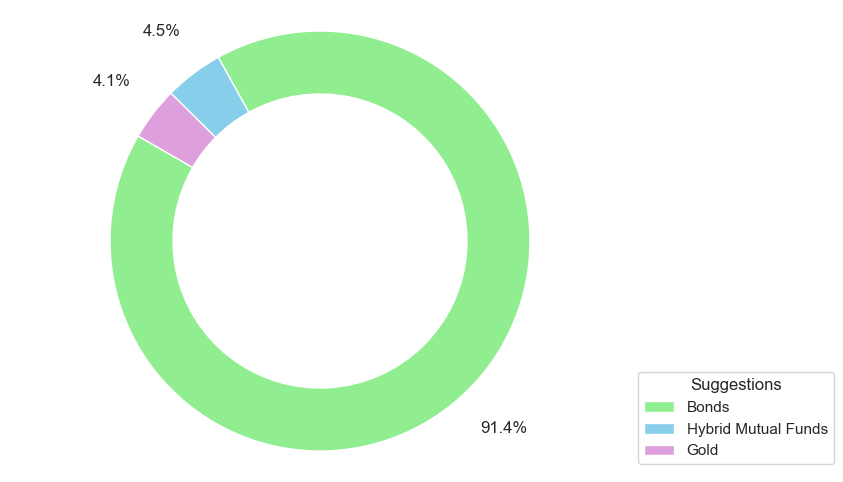

In [22]:
suggestions = calculate_result(y_pred_df)
print(suggestions)